In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 28})

In [2]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"

In [3]:
with open(data_dir+"galaxies_tng300_072_direct_slope_aperture.txt",'rb') as f: 
    slope_aper_tab0=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_slope_outskirt.txt",'rb') as f: 
    slope_out_tab0=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_bootstrap_scatter_aperture.txt",'rb') as f: 
    scatter_aper_tab0=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_bootstrap_scatter_outskirt.txt",'rb') as f: 
    scatter_out_tab0=pickle.load(f)

In [4]:
with open(data_dir+"galaxies_tng300_072_direct_mock_slope_aperture.txt",'rb') as f: 
    slope_aper_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_mock_slope_outskirt.txt",'rb') as f: 
    slope_out_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_mock_scatter_aperture.txt",'rb') as f: 
    scatter_aper_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_direct_mock_scatter_outskirt.txt",'rb') as f: 
    scatter_out_tab1=pickle.load(f)

In [5]:
with open(data_dir+"galaxies_tng300_072_new_slope_reff_aperture_1.txt",'rb') as f: 
    slope_aper_tab2=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_slope_reff_outskirt_1.txt",'rb') as f: 
    slope_out_tab2=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_reff_bootstrap_scatter_aperture.txt",'rb') as f: 
    scatter_aper_tab2=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_reff_bootstrap_scatter_outskirt.txt",'rb') as f: 
    scatter_out_tab2=pickle.load(f)

In [6]:
with open(data_dir+"galaxies_tng300_072_new_mock_reff_slope_aperture_1.txt",'rb') as f: 
    slope_aper_tab3=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_slope_outskirt_1.txt",'rb') as f: 
    slope_out_tab3=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_scatter_aperture_1.txt",'rb') as f: 
    scatter_aper_tab3=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_scatter_outskirt_1.txt",'rb') as f: 
    scatter_out_tab3=pickle.load(f)

In [7]:
color_list=['steelblue','orangered','darkgrey']

In [8]:
slope_aper_tab3

aperture_size,slope_aper_ins_xy,slope_aper_ins_xy_err,slope_aper_ins_yz,slope_aper_ins_yz_err,slope_aper_ins_xz,slope_aper_ins_xz_err,slope_aper_exs_xy,slope_aper_exs_xy_err,slope_aper_exs_yz,slope_aper_exs_yz_err,slope_aper_exs_xz,slope_aper_exs_xz_err,slope_aper_gal_xy,slope_aper_gal_xy_err,slope_aper_gal_yz,slope_aper_gal_yz_err,slope_aper_gal_xz,slope_aper_gal_xz_err,slope_aper_ins_force_xy,slope_aper_ins_force_xy_err,slope_aper_ins_force_yz,slope_aper_ins_force_yz_err,slope_aper_ins_force_xz,slope_aper_ins_force_xz_err,slope_aper_exs_force_xy,slope_aper_exs_force_xy_err,slope_aper_exs_force_yz,slope_aper_exs_force_yz_err,slope_aper_exs_force_xz,slope_aper_exs_force_xz_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1.0467963973514307,0.006432285157880036,1.0448823109576282,0.00652730837362602,1.0457038275702784,0.006520970402066323,1.0397745272530543,0.004184385471601579,1.0352590860144448,0.004226244750223664,1.0370584061575745,0.004193454279834504,1.3391253000253756,0.006282530673283734,1.3393972413007629,0.0060464050370720454,1.3419097497839982,0.006190559834247973,0.8695311715097379,0.00497072281006133,0.8684828634546548,0.004927442505441451,0.8679313645590501,0.005005824318980283,0.5129786675227374,0.0021748486622386386,0.5132960952393266,0.002116955278175081,0.5103469600456739,0.0021001327389221745
2,0.9798084018503619,0.0063248761957313175,0.9747163230251324,0.006444473822994642,0.9763608947694982,0.0061825995099205125,1.0420965958708954,0.004348276036579335,1.0394392957297036,0.004151695332113455,1.0402805214423831,0.004090332100872878,1.3122652473803234,0.0059360504920045265,1.312470043932233,0.006230215225159356,1.314741216528521,0.006041395530714971,0.9758179718944198,0.005799663658433831,0.973772388039171,0.005802932570475506,0.9738907589349522,0.006159947053588771,0.6369597830391736,0.002670203079455437,0.6342479262581384,0.002532700304228006,0.632457107819258,0.0025806548078957147
3,0.9935197410805717,0.006610158484947333,0.9892222892822217,0.006447433110640503,0.9915908920600007,0.006550267724950442,1.041195267324861,0.0041007926233357795,1.0388844442866931,0.003994649959011306,1.0391996939127064,0.004110379985040604,1.295849950221199,0.005904921785220024,1.2968636344194338,0.005889007754866729,1.298582202563803,0.00587729978290107,1.0214457479493964,0.006280723214644455,1.0193984154402707,0.006244316196960233,1.0199488797491996,0.006233460642029003,0.7094731292754913,0.002922199398494082,0.7053328844131219,0.00282496350369378,0.7024802333899837,0.002797942776577571
4,1.0123987050995356,0.00657403183681338,1.0090063688431192,0.006885889038269075,1.0105658846790233,0.00661217552919,1.041876880847566,0.004041885187153878,1.0400193537062346,0.0040178138880900055,1.0407808401273615,0.003965105621233013,1.2898764267951808,0.005979628426781273,1.2912081018666755,0.00572110875104223,1.2925072438140872,0.005858725198158845,1.0460507598796884,0.006432858845313356,1.0443944675432457,0.006525634382463268,1.046010555001906,0.006461598465396867,0.7596173590446562,0.0030560593991791067,0.7547851250331137,0.003003448491791634,0.7525032666783603,0.002913881527921816
5,1.0291091251047397,0.006886181124086834,1.0264806791437553,0.006880870623940935,1.0277410980705362,0.006980772414993597,1.0437773206349954,0.003997799120153496,1.0412010698356846,0.004034132042965231,1.042325281737308,0.00404894430210443,1.2878816745324106,0.005751492383403021,1.288689282725523,0.0058085094087184635,1.2901922232632612,0.005743733023480204,1.0620984638150668,0.006564090947233786,1.0601142933855359,0.006302982604157034,1.061618330119905,0.0067471428891397525,0.7984754689883132,0.0033027104681175017,0.7923692626804013,0.003018481383015682,0.7905158698375642,0.0031746456743760223
8,1.0625311851652974,0.007057111409490773,1.0599355434581907,0.0069

In [9]:
with open(data_dir+"galaxies_tng300_072_aperture_1.txt",'rb') as f: 
    tab=pickle.load(f)

In [10]:
sma_list=np.asarray([30,50,75,100,150])
mass_bin=np.arange(11.2,12.5,0.1)
apersize=np.asarray([30,50,100,150])
outer=np.asarray([30,50,75])

In [11]:
scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1

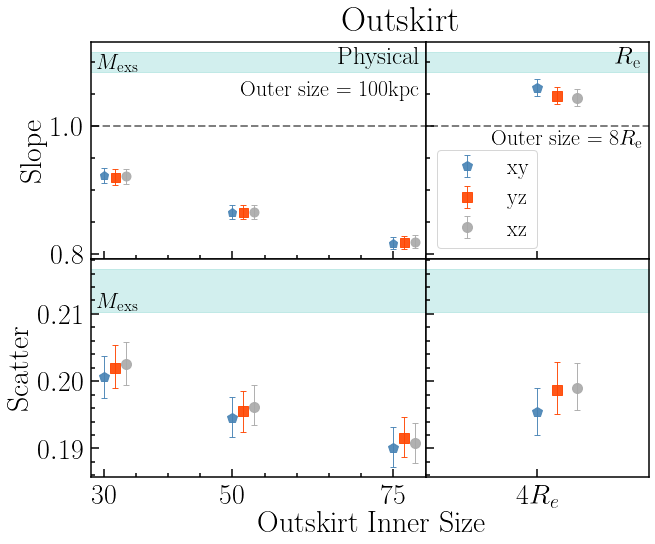

In [46]:
fig=plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0,width_ratios=(0.6,0.4))
(ax21,ax22),(ax41,ax42) = gs.subplots(sharex='col', sharey='row')
projlist=['xy','yz','xz']
color_list=['steelblue','orangered','darkgrey']
fmtlist=['p','s','o']

scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1
apersize=np.asarray([30,60,90,120])
outer=np.asarray([30,50,75])

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab['slope_out_exs_'+proj],yerr=slope_out_tab['slope_out_exs_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=9)
    err1=scatter_out_tab['scatter_out_exs_'+proj]-scatter_out_tab['scatter_out_exs_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_exs_'+proj+'_err2']-scatter_out_tab['scatter_out_exs_'+proj]
    ax41.errorbar(outer+i0,scatter_out_tab['scatter_out_exs_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)
"""
for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab_mock['slope_out_exs_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=10)
    ax41.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_exs_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)
"""


scatter_aper_tab=scatter_aper_tab2[(scatter_aper_tab2['aperture_size']>2)&(scatter_aper_tab2['aperture_size']<9)&(scatter_aper_tab2['aperture_size']!=4)]
slope_aper_tab=slope_aper_tab2[(slope_aper_tab2['aperture_size']>2)&(slope_aper_tab2['aperture_size']<9)&(slope_aper_tab2['aperture_size']!=4)]
slope_out_tab=slope_out_tab2[slope_out_tab2['outskirt_inner_size']==4]
scatter_out_tab=scatter_out_tab2[scatter_out_tab2['outskirt_inner_size']==4]
scatter_aper_tab_mock=scatter_aper_tab3[(scatter_aper_tab3['aperture_size']>2)&(scatter_aper_tab3['aperture_size']<9)&(scatter_aper_tab3['aperture_size']!=4)]
slope_aper_tab_mock=slope_aper_tab3[(slope_aper_tab3['aperture_size']>2)&(slope_aper_tab3['aperture_size']<9)&(slope_aper_tab3['aperture_size']!=4)]
slope_out_tab_mock=slope_out_tab3[slope_out_tab3['outskirt_inner_size']==4]
scatter_out_tab_mock=scatter_out_tab3[scatter_out_tab3['outskirt_inner_size']==4]
apersize=np.asarray([3,6,9])
outer=np.asarray([4])

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii])*0.18
    ax22.errorbar(outer+i0,slope_out_tab['slope_out_exs_force_'+proj],yerr=slope_out_tab['slope_out_exs_force_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=10,label=r'\rm '+proj)
    err1=scatter_out_tab['scatter_out_exs_force_'+proj]-scatter_out_tab['scatter_out_exs_force_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_exs_force_'+proj+'_err2']-scatter_out_tab['scatter_out_exs_force_'+proj]
    ax42.errorbar(outer+i0,scatter_out_tab['scatter_out_exs_force_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)

"""
for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii])*0.18
    ax22.errorbar(outer+i0,slope_out_tab_mock['slope_out_exs_force_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=10)
    ax42.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_exs_force_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)
"""

#ax41.errorbar((10,20),(0.2,0.2),color='black',fmt='h',markersize=10,label=r'\rm Original')
#ax41.errorbar((10,20),(0.2,0.2),mec='black',mfc='White',fmt='h',markersize=10,label=r'\rm + Uncertainty')

x1=np.arange(20,180,20)
x2=np.arange(20,100,10)
y1=slope_exs_tab['xy']+slope_exs_err['xy']+0*x1
y2=slope_exs_tab['xy']-slope_exs_err['xy']+0*x1
y3=scatter_exs_err1['xy']+0*x1
y4=scatter_exs_err2['xy']+0*x1
c0='lightseagreen'  
ax21.fill_between(x2,y1,y2,alpha=0.2,color=c0) 
ax41.fill_between(x2,y3,y4,alpha=0.2,color=c0)   
ax21.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')

x1=np.arange(2,12,1)
x2=np.arange(2,7,0.5)
y1=slope_exs_tab['xy']+slope_exs_err['xy']+0*x1
y2=slope_exs_tab['xy']-slope_exs_err['xy']+0*x1
y3=scatter_exs_err1['xy']+0*x1
y4=scatter_exs_err2['xy']+0*x1
c0='lightseagreen'  
ax22.fill_between(x2,y1,y2,alpha=0.2,color=c0)
ax42.fill_between(x2,y3,y4,alpha=0.2,color=c0)  
ax22.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')
    

ax21.set_xlim(28,80)

ax22.set_xlim(3,5)

ax21.text(0.75, 1.05, r'\rm Outskirt', transform=ax21.transAxes, size=35)

ax41.text(0.5, -0.25, r'\rm Outskirt Inner Size', transform=ax41.transAxes, size=30)
ax21.text(0.74, 0.9, r'\rm Physical', transform=ax21.transAxes, size=25)
ax22.text(0.85, 0.9, r'$R_{\rm e}$', transform=ax22.transAxes, size=25)
ax21.text(0.45, 0.75, r'\rm Outer size $=100{\rm kpc}$', transform=ax21.transAxes, size=22)
ax22.text(0.3, 0.53, r'\rm Outer size $=8R_{\rm e}$', transform=ax22.transAxes, size=22)
#ax11.set_title(r'\rm Aperture',fontsize=30)
#ax31.set_xlabel(r'\rm Aperture Size/kpc',fontsize=25)
#ax32.set_xlabel(r'\rm Aperture Size/$R_{\rm e}$',fontsize=25)
ax21.set_ylabel(r'\rm Slope',fontsize=30)
ax41.set_ylabel(r'\rm Scatter',fontsize=30)
#ax21.set_title(r'\rm Outskirt [$\#$,100]kpc',fontsize=30)
ax22.legend(fontsize=22,loc=3)
#ax31.legend(fontsize=25)
#ax41.legend(fontsize=22,loc=1)
#_= ax41.set_xlabel(r'\rm Outskirt Inner Size/kpc',fontsize=25)
#_= ax42.set_xlabel(r'\rm Outskirt Inner Size/$R_{\rm e}$',fontsize=25)
ax41.text(0.02, 0.78, r'$M_{\rm exs}$', transform=ax41.transAxes, size=22)
ax21.text(0.02, 0.88, r'$M_{\rm exs}$', transform=ax21.transAxes, size=22)


ax41.set_xticks([30,50,75])
ax42.set_xticks([4],[r'$4R_e$'])


plt.savefig(fig_dir+"Fig6.png",dpi=500)

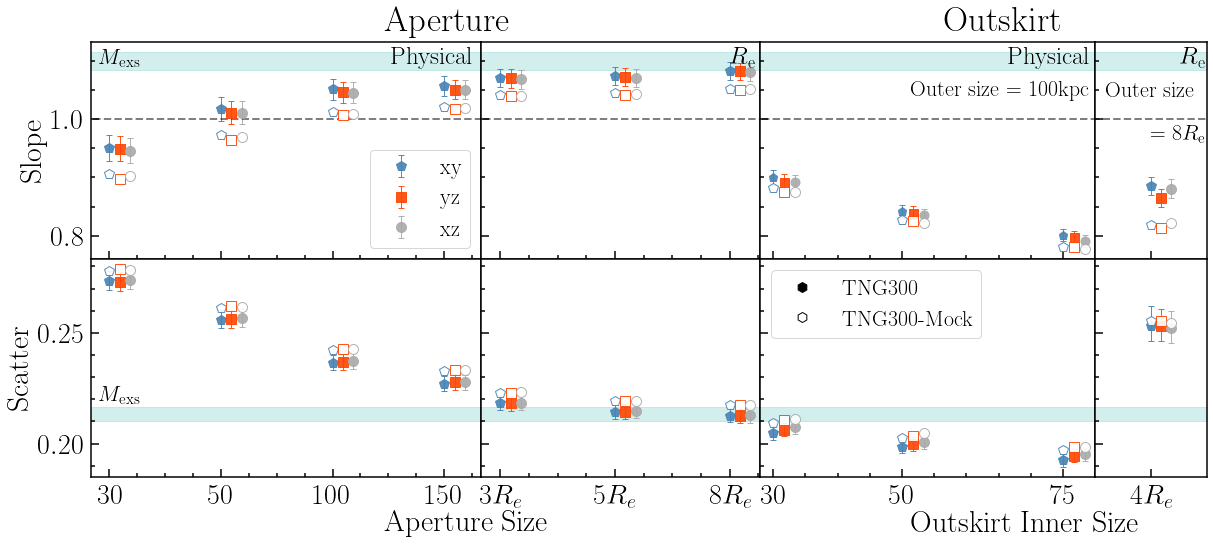

In [20]:
def linear1d(x,a,b):
    return a*x+b

In [21]:
slope_ins_tab={}
slope_ins_err={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    ydata=np.log10(tab['mass_halo'][mask])
    xdata=np.log10(tab['mass_stellar_ins'][mask])
    popt,pcov=curve_fit(linear1d,xdata,ydata)
    slope_ins_tab[proj]=popt[0]
    slope_ins_err[proj]=np.sqrt(pcov[0,0])
slope_exs_tab={}
slope_exs_err={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    ydata=np.log10(tab['mass_halo'][mask])
    xdata=np.log10(tab['mass_stellar_exs'][mask])
    popt,pcov=curve_fit(linear1d,xdata,ydata)
    slope_exs_tab[proj]=popt[0]
    slope_exs_err[proj]=np.sqrt(pcov[0,0])
scatter_ins_tab={}
scatter_ins_err1={}
scatter_ins_err2={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    std=np.std(np.log10(tab['mass_halo'][mask])-slope_ins_tab[proj]*np.log10(tab['mass_stellar_ins'][mask]),ddof=1)
    data=np.log10(tab['mass_halo'][mask])-slope_ins_tab[proj]*np.log10(tab['mass_stellar_ins'][mask])
    err=bootstrap((data,),np.std,n_resamples=8000,confidence_level=0.7)
    scatter_ins_err1[proj]=err.confidence_interval[0]
    scatter_ins_err2[proj]=err.confidence_interval[1]
    scatter_ins_tab[proj]=std
scatter_exs_tab={}
scatter_exs_err1={}
scatter_exs_err2={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    std=np.std(np.log10(tab['mass_halo'][mask])-slope_exs_tab[proj]*np.log10(tab['mass_stellar_exs'][mask]),ddof=1)
    data=np.log10(tab['mass_halo'][mask])-slope_exs_tab[proj]*np.log10(tab['mass_stellar_exs'][mask])
    err=bootstrap((data,),np.std,n_resamples=8000,confidence_level=0.7)
    scatter_exs_err1[proj]=err.confidence_interval[0]
    scatter_exs_err2[proj]=err.confidence_interval[1]
    scatter_exs_tab[proj]=std

In [13]:
scatter_exs_tab['yz']

0.21310565699458045

In [55]:
slope_out_tab

outskirt_inner_size,slope_out_ins_xy,slope_out_ins_xy_err,slope_out_ins_yz,slope_out_ins_yz_err,slope_out_ins_xz,slope_out_ins_xz_err,slope_out_exs_xy,slope_out_exs_xy_err,slope_out_exs_yz,slope_out_exs_yz_err,slope_out_exs_xz,slope_out_exs_xz_err,slope_out_gal_xy,slope_out_gal_xy_err,slope_out_gal_yz,slope_out_gal_yz_err,slope_out_gal_xz,slope_out_gal_xz_err,slope_out_ins_force_xy,slope_out_ins_force_xy_err,slope_out_ins_force_yz,slope_out_ins_force_yz_err,slope_out_ins_force_xz,slope_out_ins_force_xz_err,slope_out_exs_force_xy,slope_out_exs_force_xy_err,slope_out_exs_force_yz,slope_out_exs_force_yz_err,slope_out_exs_force_xz,slope_out_exs_force_xz_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
30,0.632391251344298,0.01606225618753953,0.6256210700365128,0.0161352748482969,0.622660801887766,0.01608806145760545,0.8986392546418362,0.012441178300259662,0.8910272144914163,0.012530875659113278,0.8885234454952365,0.012670306999256755,0.9641591512878611,0.013139738087989941,0.9571331988826097,0.013216095555077448,0.9564643289672498,0.013308102850143026,0.660245249311531,0.016398169786231355,0.6524074273739477,0.01640778219771092,0.6463903982075838,0.016414190742803335,0.8998177093483394,0.012143541996947302,0.892735779923457,0.01218453120481943,0.8918521166522062,0.012265564187118005
50,0.5935437308312616,0.01332457117370185,0.5954305721549908,0.01357914932562699,0.5909030668124837,0.013605267913914454,0.8385867120238284,0.011184674764506181,0.8350120599162474,0.011273174935106042,0.8294728001353334,0.011393658219187919,0.889770543632787,0.011463230237688157,0.8877490585548296,0.011605075791151732,0.8842311195140734,0.011651227466541986,0.6134710186106193,0.013561356259703259,0.6237333623208265,0.013842560013529055,0.6241564883085056,0.013903893550080848,0.8420044328332343,0.010873091172845035,0.8394309712617698,0.010961159421683887,0.8355045831787601,0.01099290755308037
75,0.5884331922906616,0.012189364748327025,0.5905897951753274,0.012160893599188174,0.5742226882688832,0.012260639947210918,0.799197358357252,0.01045908473147742,0.7956786269134664,0.010481624943719034,0.7870496955809877,0.010545297569071254,0.8438728597093169,0.010624500438388512,0.841656179826,0.010653763004717504,0.8343619214085106,0.01069396187578518,0.6219227910803415,0.012547808053243365,0.6157809813326269,0.012432236486005582,0.6116631941143673,0.012570952018573158,0.8016221526714551,0.010145827650503784,0.7981026020235843,0.01016441612064551,0.7911230380620186,0.01015828728969199


In [ ]:
fig=plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2,4, hspace=0, wspace=0,width_ratios=(0.35,0.25,0.3,0.1))
(ax11,ax12,ax21,ax22),(ax31,ax32,ax41,ax42) = gs.subplots(sharex='col', sharey='row')
projlist=['xy','yz','xz']
color_list=['steelblue','orangered','darkgrey']
fmtlist=['p','s','o']

scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1
apersize=np.asarray([30,60,90,120])
outer=np.asarray([30,50,75])

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab['slope_aper_exs_force_'+proj],yerr=slope_aper_tab['slope_aper_exs_force_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=10,label=r'\rm '+proj)
    err1=scatter_aper_tab['scatter_aper_exs_force_'+proj]-scatter_aper_tab['scatter_aper_exs_force_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_exs_force_'+proj+'_err2']-scatter_aper_tab['scatter_aper_exs_force_'+proj]
    ax31.errorbar(apersize+i0,scatter_aper_tab['scatter_aper_exs_force_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab['slope_out_exs_force_'+proj],yerr=slope_out_tab['slope_out_exs_force_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=9)
    err1=scatter_out_tab['scatter_out_exs_force_'+proj]-scatter_out_tab['scatter_out_exs_force_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_exs_force_'+proj+'_err2']-scatter_out_tab['scatter_out_exs_force_'+proj]
    ax41.errorbar(outer+i0,scatter_out_tab['scatter_out_exs_force_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab_mock['slope_aper_exs_force_'+proj],mec=col,mfc='White',alpha=0.9, fmt=fmt, 
                 markersize=10)
    ax31.errorbar(apersize+i0,scatter_aper_tab_mock['scatter_aper_exs_force_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab_mock['slope_out_exs_force_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=10)
    ax41.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_exs_force_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)


scatter_aper_tab=scatter_aper_tab2[(scatter_aper_tab2['aperture_size']>2)&(scatter_aper_tab2['aperture_size']<9)&(scatter_aper_tab2['aperture_size']!=4)]
slope_aper_tab=slope_aper_tab2[(slope_aper_tab2['aperture_size']>2)&(slope_aper_tab2['aperture_size']<9)&(slope_aper_tab2['aperture_size']!=4)]
slope_out_tab=slope_out_tab2[slope_out_tab2['outskirt_inner_size']==4]
scatter_out_tab=scatter_out_tab2[scatter_out_tab2['outskirt_inner_size']==4]
scatter_aper_tab_mock=scatter_aper_tab3[(scatter_aper_tab3['aperture_size']>2)&(scatter_aper_tab3['aperture_size']<9)&(scatter_aper_tab3['aperture_size']!=4)]
slope_aper_tab_mock=slope_aper_tab3[(slope_aper_tab3['aperture_size']>2)&(slope_aper_tab3['aperture_size']<9)&(slope_aper_tab3['aperture_size']!=4)]
slope_out_tab_mock=slope_out_tab3[slope_out_tab3['outskirt_inner_size']==4]
scatter_out_tab_mock=scatter_out_tab3[scatter_out_tab3['outskirt_inner_size']==4]
apersize=np.asarray([3,6,9])
outer=np.asarray([4])

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*0.27
    ax12.errorbar(apersize+i0,slope_aper_tab['slope_aper_exs_'+proj],yerr=slope_aper_tab['slope_aper_exs_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=10)
    err1=scatter_aper_tab['scatter_aper_exs_'+proj]-scatter_aper_tab['scatter_aper_exs_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_exs_'+proj+'_err2']-scatter_aper_tab['scatter_aper_exs_'+proj]
    ax32.errorbar(apersize+i0,scatter_aper_tab['scatter_aper_exs_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)
    i0=np.asarray([ii])*0.18
    ax22.errorbar(outer+i0,slope_out_tab['slope_out_exs_'+proj],yerr=slope_out_tab['slope_out_exs_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=3, capthick=1, elinewidth=1, markersize=10,label=r'\rm '+proj)
    err1=scatter_out_tab['scatter_out_exs_'+proj]-scatter_out_tab['scatter_out_exs_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_exs_'+proj+'_err2']-scatter_out_tab['scatter_out_exs_'+proj]
    ax42.errorbar(outer+i0,scatter_out_tab['scatter_out_exs_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=3, capthick=1, elinewidth=1,fmt=fmt,markersize=10)

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*0.27
    ax12.errorbar(apersize+i0,slope_aper_tab_mock['slope_aper_exs_'+proj],mec=col,mfc='White',alpha=0.9, fmt=fmt, 
                 markersize=10)
    ax32.errorbar(apersize+i0,scatter_aper_tab_mock['scatter_aper_exs_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)
    i0=np.asarray([ii])*0.18
    ax22.errorbar(outer+i0,slope_out_tab_mock['slope_out_exs_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=10)
    ax42.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_exs_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=10)


ax41.errorbar((10,20),(0.2,0.2),color='black',fmt='h',markersize=10,label=r'\rm TNG300')
ax41.errorbar((10,20),(0.2,0.2),mec='black',mfc='White',fmt='h',markersize=10,label=r'\rm TNG300-Mock')

x1=np.arange(20,180,20)
x2=np.arange(20,100,10)
y1=slope_exs_tab['xy']+slope_exs_err['xy']+0*x1
y2=slope_exs_tab['xy']-slope_exs_err['xy']+0*x1
y3=scatter_exs_err1['xy']+0*x1
y4=scatter_exs_err2['xy']+0*x1
c0='lightseagreen'
ax11.fill_between(x1,y1,y2,alpha=0.2,color=c0)   
ax21.fill_between(x2,y1,y2,alpha=0.2,color=c0)
ax31.fill_between(x1,y3,y4,alpha=0.2,color=c0,label=r'$M_{\rm exs}$')   
ax41.fill_between(x2,y3,y4,alpha=0.2,color=c0)
ax11.plot(x1,1+0*x1,alpha=0.5,color='black',lw=2,ls='--')   
ax21.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')

x1=np.arange(2,12,1)
x2=np.arange(2,7,0.5)
y1=slope_exs_tab['xy']+slope_exs_err['xy']+0*x1
y2=slope_exs_tab['xy']-slope_exs_err['xy']+0*x1
y3=scatter_exs_err1['xy']+0*x1
y4=scatter_exs_err2['xy']+0*x1
c0='lightseagreen'
ax12.fill_between(x1,y1,y2,alpha=0.2,color=c0)   
ax22.fill_between(x2,y1,y2,alpha=0.2,color=c0)
ax32.fill_between(x1,y3,y4,alpha=0.2,color=c0,label=r'$M_{\rm exs}$')   
ax42.fill_between(x2,y3,y4,alpha=0.2,color=c0)
ax12.plot(x1,1+0*x1,alpha=0.5,color='black',lw=2,ls='--')   
ax22.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')
    
ax11.set_xlim(25,130)
ax21.set_xlim(28,80)
ax12.set_xlim(2.5,9.8)
ax22.set_xlim(3,5)
ax11.text(0.75, 1.05, r'\rm Aperture', transform=ax11.transAxes, size=35)
ax21.text(0.55, 1.05, r'\rm Outskirt', transform=ax21.transAxes, size=35)
ax31.text(0.75, -0.25, r'\rm Aperture Size', transform=ax31.transAxes, size=30)
ax41.text(0.45, -0.25, r'\rm Outskirt Inner Size', transform=ax41.transAxes, size=30)
ax11.text(0.77, 0.9, r'\rm Physical', transform=ax11.transAxes, size=25)
ax12.text(0.89, 0.9, r'$R_{\rm e}$', transform=ax12.transAxes, size=25)
ax21.text(0.74, 0.9, r'\rm Physical', transform=ax21.transAxes, size=25)
ax22.text(0.76, 0.9, r'$R_{\rm e}$', transform=ax22.transAxes, size=25)
ax21.text(0.45, 0.75, r'\rm Outer size $=100{\rm kpc}$', transform=ax21.transAxes, size=22)
ax22.text(0.1, 0.75, r'\rm Outer size ', transform=ax22.transAxes, size=22)
ax22.text(0.5, 0.55, r'$=8R_{\rm e}$', transform=ax22.transAxes, size=22)
#ax11.set_title(r'\rm Aperture',fontsize=30)
#ax31.set_xlabel(r'\rm Aperture Size/kpc',fontsize=25)
#ax32.set_xlabel(r'\rm Aperture Size/$R_{\rm e}$',fontsize=25)
ax11.set_ylabel(r'\rm Slope',fontsize=30)
ax31.set_ylabel(r'\rm Scatter',fontsize=30)
#ax21.set_title(r'\rm Outskirt [$\#$,100]kpc',fontsize=30)
ax11.legend(fontsize=22,loc=4)
#ax31.legend(fontsize=25)
ax41.legend(fontsize=22,loc=2)
#_= ax41.set_xlabel(r'\rm Outskirt Inner Size/kpc',fontsize=25)
#_= ax42.set_xlabel(r'\rm Outskirt Inner Size/$R_{\rm e}$',fontsize=25)
ax31.text(0.02, 0.35, r'$M_{\rm exs}$', transform=ax31.transAxes, size=22)
ax11.text(0.02, 0.9, r'$M_{\rm exs}$', transform=ax11.transAxes, size=22)


ax31.set_xticks([30,60,90,120],[r'$30$',r'$50$',r'$100$',r'$150$'])
ax32.set_xticks([3,6,9],[r'$3R_e$',r'$5R_e$',r'$8R_e$'])
ax41.set_xticks([30,50,75])
ax42.set_xticks([4],[r'$4R_e$'])


plt.savefig(fig_dir+"Fig6A.png",dpi=500)